In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib','inline')
sns.set(style='white',context='notebook',palette='deep')
import warnings
warnings.filterwarnings('ignore')

#csv files

train= pd.read_csv("/home/killerivy/Downloads/train.csv")
test= pd.read_csv("/home/killerivy/Downloads/test.csv")
IDtest = test["PassengerId"]

#train.head()
#train.info()
#test.info()


In [2]:
#dealing with missing values in train dataset
train_na=(train.isnull().sum()/len(train))* 100
train_na=train_na.drop(train_na[train_na==0].index).sort_values(ascending=False)[0:30]
miss_train = pd.DataFrame({'Train Missing Ratio': train_na})
miss_train

,Train Missing Ratio
Cabin,77.104377
Age,19.865320
Embarked,0.224467


In [3]:
#dealing with missing values in test dataset
test_na=(test.isnull().sum()/len(test))* 100
test_na=test_na.drop(test_na[test_na==0].index).sort_values(ascending=False)[0:30]
miss_test = pd.DataFrame({'Test Missing Ratio': test_na})
miss_test

,Test Missing Ratio
Cabin,78.229665
Age,20.574163
Fare,0.239234


In [4]:
#fill emptys with NaN
train=(train.fillna(np.nan))
test=(test.fillna(np.nan))


,Survived
Pclass,
3,491
1,216
2,184


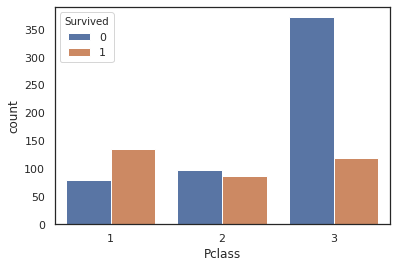

In [5]:
#Analyze the count of variable by Pclass
ax = sns.countplot(x='Pclass',hue='Survived',data=train)
train[['Pclass','Survived']].groupby(['Pclass']).count().sort_values(by='Survived',ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


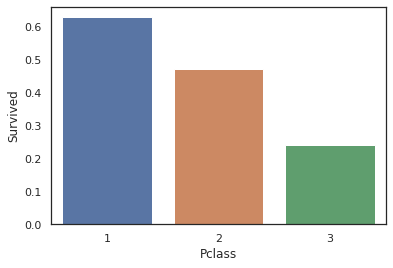

In [6]:
#survivor prpbability by Pclass
g = sns.barplot(x='Pclass',y="Survived",data=train,ci=None)
#h = sns.barplot(x='Pclass',y="Survived",data=train)
#g=g.set_ylabel("Survival Probability")
train[['Pclass','Survived']].groupby(['Pclass']).mean().sort_values(by='Survived',ascending=False)


,Survived
Sex,
male,577
female,314


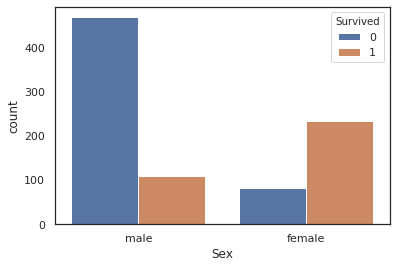

In [7]:
#count number of passengers by gender
ax = sns.countplot(x='Sex',hue="Survived",data=train)
train[['Sex','Survived']].groupby(['Sex']).count().sort_values(by='Survived',ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


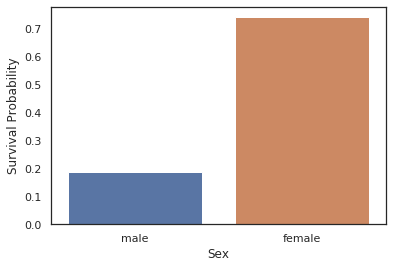

In [8]:

#train[['Sex','Survived']].groupby(['Sex']).head()
g= sns.barplot(x="Sex",y="Survived",data=train,ci=None)
g=g.set_ylabel("Survival Probability")
train[['Sex','Survived']].groupby(['Sex']).mean().sort_values(by='Survived',ascending=False)


Text(0, 0.5, 'Frequency')

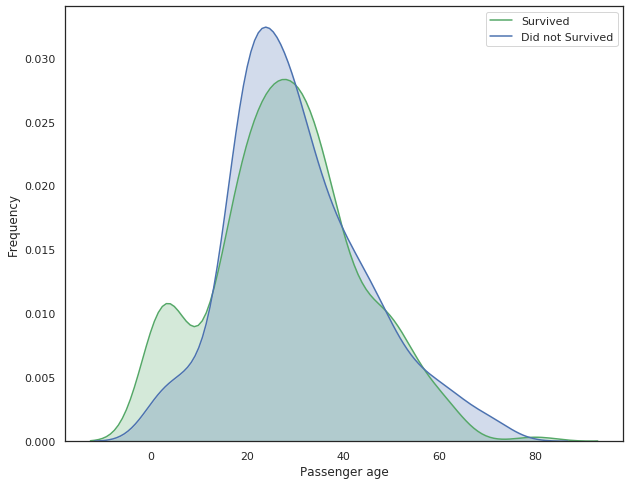

In [9]:
#AGE
fig=plt.figure(figsize=(10,8),)
axis= sns.kdeplot(train.loc[(train['Survived']==1),'Age'],color='g',shade=True,label="Survived")
axis= sns.kdeplot(train.loc[(train['Survived']==0),'Age'],color='b',shade=True,label="Did not Survived")
plt.xlabel("Passenger age")
plt.ylabel("Frequency")

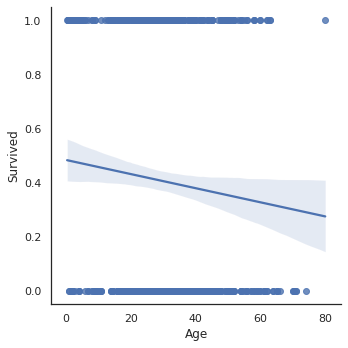

In [10]:
sns.lmplot('Age','Survived',data=train)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

,Survived
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


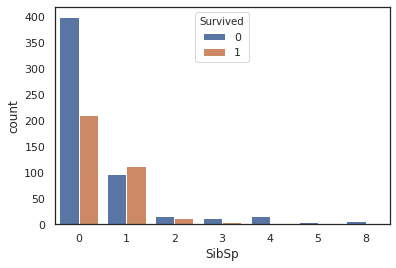

In [11]:
#analyzing count by siblings and parents
ax= sns.countplot(x='SibSp',hue='Survived',data=train)
train[['SibSp','Survived']].groupby(['SibSp']).count().sort_values(by='Survived',ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


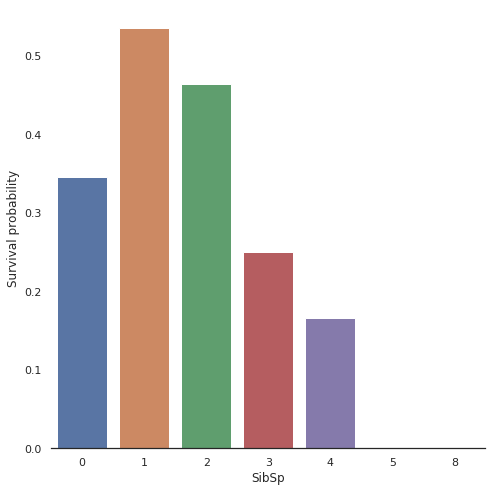

In [12]:
#analyze probability of survival by siblings and parents
g= sns.factorplot(x="SibSp",y="Survived",data=train,kind="bar",ci=None,size=7)
g.despine(left=True)
g=g.set_ylabels("Survival probability")
train[['SibSp','Survived']].groupby(['SibSp']).mean().sort_values(by='Survived',ascending =False)

,Survived
Parch,
0,678
1,118
2,80
3,5
5,5
4,4
6,1


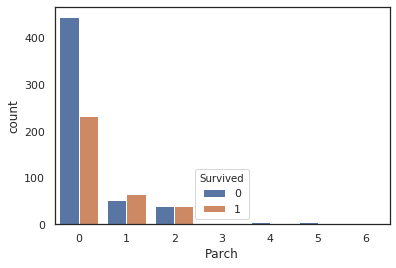

In [13]:
#AnALYZE the count survivors by parch   parent childern
ax=sns.countplot(x='Parch',hue="Survived",data=train)
train[['Parch','Survived']].groupby(['Parch']).count().sort_values(by='Survived',ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


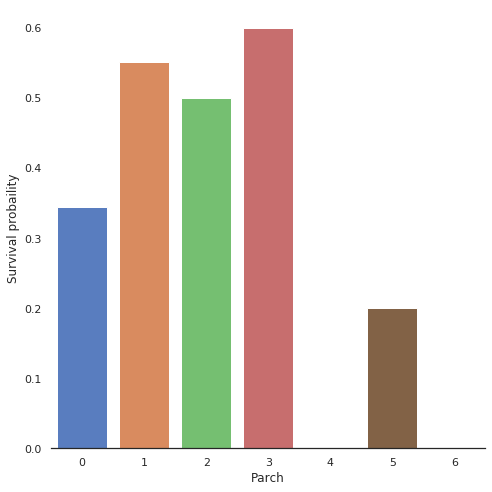

In [14]:
#analyze probabilty by Parch parent children
g=sns.factorplot(x="Parch",y="Survived",data=train,kind="bar",ci=None,size=7,palette="muted")
g.despine(left=True)
g= g.set_ylabels("Survival probaility")
train[['Parch',"Survived"]].groupby(['Parch']).mean().sort_values(by='Survived',ascending=False)

,Survived
Embarked,
S,644
C,168
Q,77


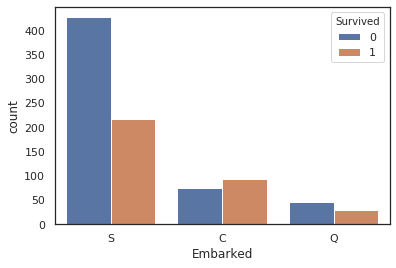

In [15]:
#analyze survival rate survial by Embarkation
ax=sns.countplot(x='Embarked',hue="Survived",data=train)
train[['Embarked',"Survived"]].groupby(["Embarked"]).count().sort_values(by="Survived",ascending=False)

In [16]:
#analyze probability by port of Embarkation

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


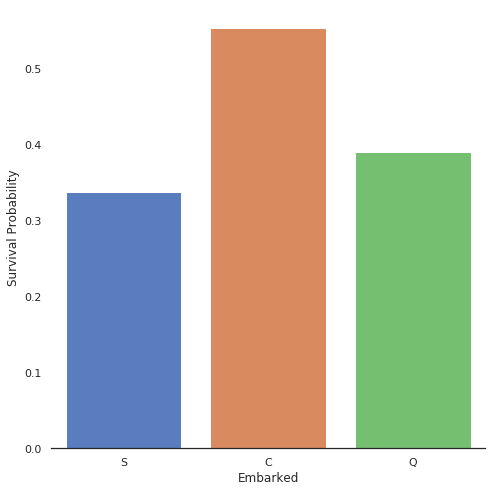

In [17]:
g=sns.factorplot(x="Embarked",y="Survived",data=train,kind='bar',size=7,ci=None,palette='muted')
g.despine(left=True)
g=g.set_ylabels("Survival Probability")
train[["Embarked","Survived"]].groupby(['Embarked']).mean().sort_values(by="Survived",ascending=False)

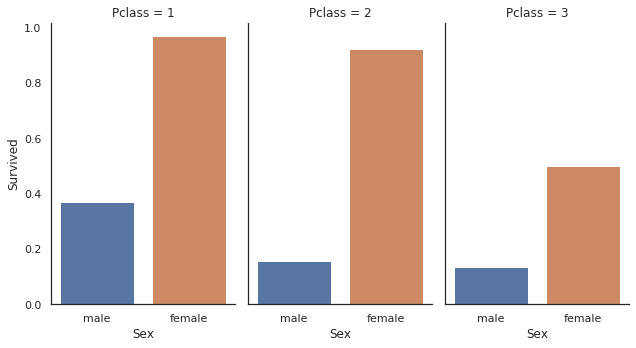

In [18]:
#Relatio amaong Pclass GEnder and survial rate
g= sns.catplot(x='Sex',y='Survived',col='Pclass',data=train,kind='bar',ci=None,aspect=.6)


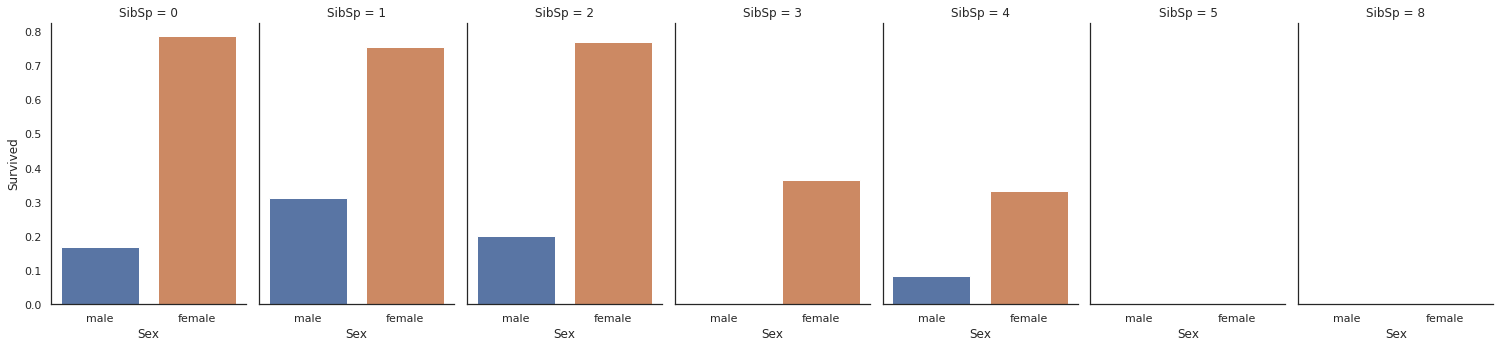

In [19]:
#Relatio amaong SibSp GEnder and survial rate
g= sns.catplot(x='Sex',y='Survived',col='SibSp',data=train,kind='bar',ci=None,aspect=.6)

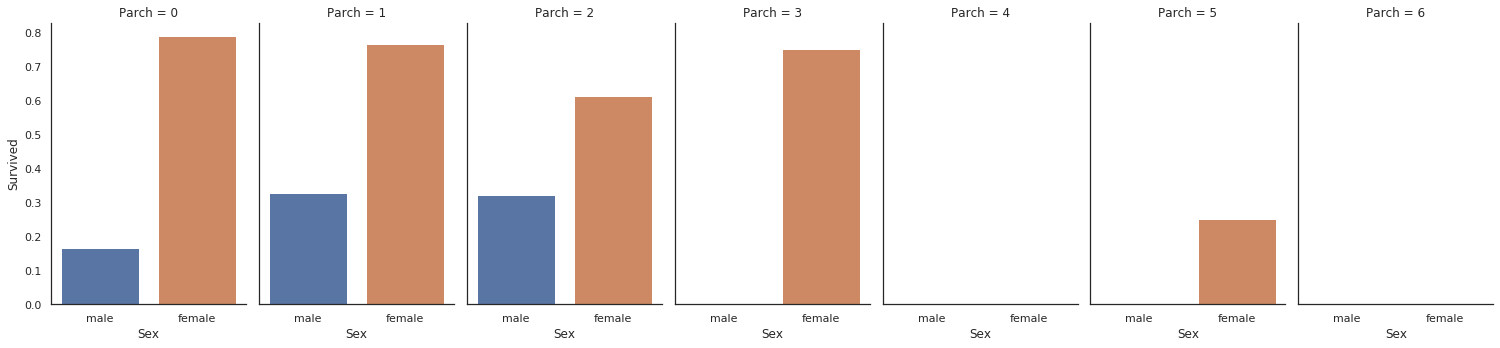

In [20]:
#Relatio amaong Parch GEnder and survial rate
g= sns.catplot(x='Sex',y='Survived',col='Parch',data=train,kind='bar',ci=None,aspect=.6)

In [21]:
""""What we need to do to process following variables 

PassengerID - No action required

PClass - Have only 3 numerical values. We will use it as it is.

Name - Can be used to create new variable Title by extracting the salutation from name.

Sex - Create dummy variables

Age - Missing value treatment, followed by creating dummy variables

SibSP - Drop the variable

Parch - Drop the variable as most of the values are 0

Ticket - Create dummy variables post feature engineering

Fare - Missing value treatment followed by log normalization

Cabin - Create dummy variables post feature engineering

Embarked - Create dummy variables"""

'"What we need to do to process following variables \n\nPassengerID - No action required\n\nPClass - Have only 3 numerical values. We will use it as it is.\n\nName - Can be used to create new variable Title by extracting the salutation from name.\n\nSex - Create dummy variables\n\nAge - Missing value treatment, followed by creating dummy variables\n\nSibSP - Drop the variable\n\nParch - Drop the variable as most of the values are 0\n\nTicket - Create dummy variables post feature engineering\n\nFare - Missing value treatment followed by log normalization\n\nCabin - Create dummy variables post feature engineering\n\nEmbarked - Create dummy variables'

In [22]:
#combining train set and test set
train['source']='train'
test['source']='test'
combdata=pd.concat([train,test],ignore_index=True)
combdata

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,test
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,test
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,test
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,test


In [23]:
#as we dont need passenger id
#combdata.drop(labels=["PassengerId"],inplace=True)
#extracting unique values in Pclass
combdata['Pclass'].unique()
#Extracting salutations from name variables
salutation= [i.split(",")[1].split(".")[0].strip() for i in combdata["Name"]]
combdata["Title"]= pd.Series(salutation)
combdata["Title"].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Ms                2
Major             2
Don               1
Lady              1
Sir               1
Mme               1
Capt              1
Dona              1
Jonkheer          1
the Countess      1
Name: Title, dtype: int64

In [24]:
# PassengerID - Drop PassengerID
combdata.drop(labels = ["PassengerId"], axis = 1, inplace = True)


In [25]:
combdata

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source,Title
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train,Mr
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train,Mrs
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train,Miss
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train,Mrs
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,test,Mr
1305,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,test,Dona
1306,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,test,Mr
1307,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,test,Mr


In [26]:
combdata['Title']= combdata['Title'].replace('Mlle','Miss')
combdata['Title']= combdata['Title'].replace(['Mme','Lady','Ms'],'Mrs')
combdata.Title.loc[(combdata.Title!= 'Master') & (combdata.Title != 'Mr')&(combdata.Title !='Miss')&(combdata.Title!="Mrs")]="Others"
combdata["Title"].value_counts()

Mr        757
Miss      262
Mrs       201
Master     61
Others     28
Name: Title, dtype: int64

In [27]:
#finding probability of above
combdata[['Title','Survived']].groupby(["Title"]).mean()

,Survived
Title,
Master,0.575000
Miss,0.701087
Mr,0.156673
Mrs,0.796875
Others,0.318182


In [28]:
combdata.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source,Title
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train,Mr
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train,Mrs
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train,Miss
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train,Mrs
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train,Mr


In [29]:
# Create dummy variable 
combdata = pd.get_dummies(combdata, columns = ["Title"])

In [30]:
#checking Fare
#missing values
combdata["Fare"].isnull().sum()

1

In [31]:
#only one value missing so we will fill the same with median
combdata["Fare"] = combdata["Fare"].fillna(combdata["Fare"].median())
combdata['Fare']

0         7.2500
1        71.2833
2         7.9250
3        53.1000
4         8.0500
          ...   
1304      8.0500
1305    108.9000
1306      7.2500
1307      8.0500
1308     22.3583
Name: Fare, Length: 1309, dtype: float64

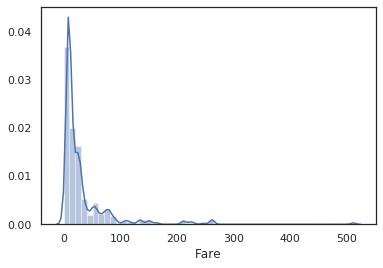

In [32]:
sns.distplot(combdata['Fare'])

In [33]:
combdata['Fare-bin'] = pd.qcut(combdata.Fare,5,labels=[1,2,3,4,5]).astype(int)

In [34]:
combdata[['Fare-bin','Survived']].groupby(['Fare-bin'],as_index=False).mean()

,Fare-bin,Survived
0,1,0.217877
1,2,0.201087
2,3,0.426901
3,4,0.443243
4,5,0.645349


In [35]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
combdata_temp = combdata[['Age','Title_Master','Title_Miss','Title_Mr','Title_Mrs','Title_Others','Fare-bin','SibSp']]

X  = combdata_temp.dropna().drop('Age', axis=1)
Y  = combdata['Age'].dropna()
holdout = combdata_temp.loc[np.isnan(combdata.Age)].drop('Age', axis=1)

regressor = RandomForestRegressor(n_estimators = 300)
#regressor = GradientBoostingRegressor(n_estimators = 500)
regressor.fit(X, Y)
y_pred = np.round(regressor.predict(holdout),1)
combdata.Age.loc[combdata.Age.isnull()] = y_pred

combdata.Age.isnull().sum(axis=0) 
bins = [ 0, 4, 12, 18, 30, 50, 65, 100] # This is somewhat arbitrary...
age_index = (1,2,3,4,5,6,7)

combdata['Age-bin'] = pd.cut(combdata.Age, bins, labels=age_index).astype(int)
combdata[['Age-bin', 'Survived']].groupby(['Age-bin'],as_index=False).mean()

,Age-bin,Survived
0,1,0.675000
1,2,0.452381
2,3,0.402597
3,4,0.315789
4,5,0.427083
5,6,0.375000
6,7,0.125000


In [36]:
combdata['Sex']= combdata['Sex'].map({"male":0,"female":1})

In [37]:
#creating family size using Parch and SibSp
combdata['Fsize']= combdata['SibSp']+combdata['Parch']+1
#add 1 for self
#analize probability
combdata[['Fsize','Survived']].groupby(['Fsize'],as_index=False).mean()

,Fsize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


,Survived
Fsize,
4,0.724138
3,0.578431
2,0.552795
1,0.303538
0,0.161290


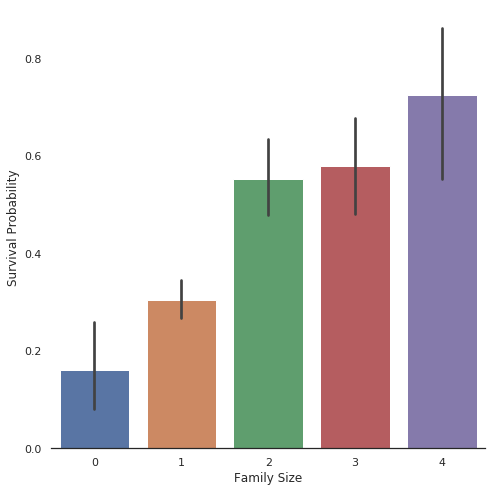

In [38]:
#it is unlikely for families with more than 4 members to survive 
combdata.Fsize = combdata.Fsize.map(lambda x: 0 if x> 4 else x)
g=sns.factorplot(x='Fsize',y='Survived',data=combdata,kind='bar',size=7)
g.despine(left=True)
g = g.set_ylabels("Survival Probability")
g = g.set_xlabels("Family Size")
combdata[['Fsize', 'Survived']].groupby(['Fsize']).mean().sort_values(by='Survived',ascending=False)

In [39]:
# SibSp - Drop the variable
combdata = combdata.drop(labels='SibSp', axis=1)
# Parch - Drop the variable
combdata = combdata.drop(labels='Parch', axis=1)

In [40]:
''''Tickets are of 2 types here.

Type 1 has only number and Type 2 is a combination of some code followed by the number. Let's extract the first digit and compare it with survival probability.'''
combdata.Ticket= combdata.Ticket.map(lambda x: x[0])
combdata[['Ticket','Survived']].groupby(['Ticket'],as_index=False).mean()

,Ticket,Survived
0,1,0.630137
1,2,0.464481
2,3,0.239203
3,4,0.200000
4,5,0.000000
5,6,0.166667
6,7,0.111111
7,8,0.000000
8,9,1.000000
9,A,0.068966


In [41]:
#number of people for each type of tickets
combdata['Ticket'].value_counts()
#Most of these tickets belong to category 1, 2, 3, S, P, C.

3    429
2    278
1    210
S     98
P     98
C     77
A     42
W     19
F     13
7     13
4     11
6      9
L      5
5      3
9      2
8      2
Name: Ticket, dtype: int64

In [42]:
combdata.Ticket=combdata.Ticket.replace(['A','W','F','L','5','6','7','8','9'], '4')
combdata[['Ticket','Survived']].groupby(['Ticket'],as_index=False).mean()

,Ticket,Survived
0,1,0.630137
1,2,0.464481
2,3,0.239203
3,4,0.166667
4,C,0.340426
5,P,0.646154
6,S,0.323077


In [43]:
# Create dummy variables
combdata = pd.get_dummies(combdata, columns = ["Ticket"], prefix="T")
combdata.head()

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,source,Title_Master,...,Fare-bin,Age-bin,Fsize,T_1,T_2,T_3,T_4,T_C,T_P,T_S
0,0.0,3,"Braund, Mr. Owen Harris",0,22.0,7.2500,NaN,S,train,0,...,1,4,2,0,0,0,1,0,0,0
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,71.2833,C85,C,train,0,...,5,5,2,0,0,0,0,0,1,0
2,1.0,3,"Heikkinen, Miss. Laina",1,26.0,7.9250,NaN,S,train,0,...,2,4,1,0,0,0,0,0,0,1
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,53.1000,C123,S,train,0,...,5,5,2,1,0,0,0,0,0,0
4,0.0,3,"Allen, Mr. William Henry",0,35.0,8.0500,NaN,S,train,0,...,2,5,1,0,0,1,0,0,0,0


In [44]:
#replace missing cabin number by Unkown Ua

combdata["Cabin"]= pd.Series([i[0] if not pd.isnull(i) else 'U' for i in combdata['Cabin']])

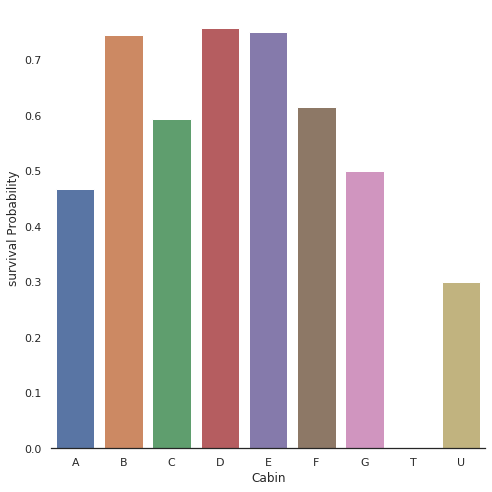

In [45]:
g=sns.factorplot(x="Cabin",y="Survived",data=combdata,kind="bar",ci=None,size=7,order=['A','B','C','D','E','F','G','T','U'])
g.despine(left=True)
g=g.set_ylabels("survival Probability")

In [46]:
combdata = combdata.drop(labels="Cabin",axis=1)
combdata = combdata.drop(labels="Embarked",axis=1)
combdata = combdata.drop(labels=['Age','Fare','Name'],axis=1)

In [47]:
###CREATING MODEL

In [48]:
from sklearn.svm import SVC
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV,cross_val_score,StratifiedKFold,learning_curve
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,ExtraTreesClassifier, VotingClassifier

In [49]:
##Separate train dataset and test data set using the index variable 'Source'

train= combdata.loc[combdata['source']=="train"]
test= combdata.loc[combdata['source']=="test"]
test.drop(labels=['Survived'],axis=1,inplace=True)
test.drop(labels=['source'],axis=1,inplace=True)
train.drop(labels=['source'],axis=1,inplace=True)
test

,Pclass,Sex,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others,Fare-bin,Age-bin,Fsize,T_1,T_2,T_3,T_4,T_C,T_P,T_S
891,3,0,0,0,1,0,0,1,5,1,0,0,1,0,0,0,0
892,3,1,0,0,0,1,0,1,5,2,0,0,1,0,0,0,0
893,2,0,0,0,1,0,0,2,6,1,0,1,0,0,0,0,0
894,3,0,0,0,1,0,0,2,4,1,0,0,1,0,0,0,0
895,3,1,0,0,0,1,0,3,4,3,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,0,0,1,0,0,2,4,1,0,0,0,1,0,0,0
1305,1,1,0,0,0,0,1,5,5,1,0,0,0,0,0,1,0
1306,3,0,0,0,1,0,0,1,5,1,0,0,0,0,0,0,1
1307,3,0,0,0,1,0,0,2,4,1,0,0,1,0,0,0,0


In [50]:
test

,Pclass,Sex,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others,Fare-bin,Age-bin,Fsize,T_1,T_2,T_3,T_4,T_C,T_P,T_S
891,3,0,0,0,1,0,0,1,5,1,0,0,1,0,0,0,0
892,3,1,0,0,0,1,0,1,5,2,0,0,1,0,0,0,0
893,2,0,0,0,1,0,0,2,6,1,0,1,0,0,0,0,0
894,3,0,0,0,1,0,0,2,4,1,0,0,1,0,0,0,0
895,3,1,0,0,0,1,0,3,4,3,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,0,0,1,0,0,2,4,1,0,0,0,1,0,0,0
1305,1,1,0,0,0,0,1,5,5,1,0,0,0,0,0,1,0
1306,3,0,0,0,1,0,0,1,5,1,0,0,0,0,0,0,1
1307,3,0,0,0,1,0,0,2,4,1,0,0,1,0,0,0,0


In [51]:
train['Survived'] = train['Survived'].astype(int)
y_train= train["Survived"]
x_train= train.drop(labels=["Survived"],axis=1)


In [52]:
x_train

,Pclass,Sex,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others,Fare-bin,Age-bin,Fsize,T_1,T_2,T_3,T_4,T_C,T_P,T_S
0,3,0,0,0,1,0,0,1,4,2,0,0,0,1,0,0,0
1,1,1,0,0,0,1,0,5,5,2,0,0,0,0,0,1,0
2,3,1,0,1,0,0,0,2,4,1,0,0,0,0,0,0,1
3,1,1,0,0,0,1,0,5,5,2,1,0,0,0,0,0,0
4,3,0,0,0,1,0,0,2,5,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,0,0,0,0,1,3,4,1,0,1,0,0,0,0,0
887,1,1,0,1,0,0,0,4,4,1,1,0,0,0,0,0,0
888,3,1,0,1,0,0,0,4,2,4,0,0,0,1,0,0,0
889,1,0,0,0,1,0,0,4,4,1,1,0,0,0,0,0,0


In [53]:
# Cross validate model with Kfold stratified cross val
kfold= StratifiedKFold(n_splits=10)

In [54]:
kfold

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

In [55]:
classifiers = []
classifiers.append(KNeighborsClassifier())
classifiers.append(LinearDiscriminantAnalysis())
classifiers.append(SVC(random_state=2))
classifiers.append(MLPClassifier(random_state=2))
classifiers.append(ExtraTreesClassifier(random_state=2))
classifiers.append(LogisticRegression(random_state=2))
classifiers.append(DecisionTreeClassifier(random_state=2))
classifiers.append(RandomForestClassifier(random_state=2))
classifiers.append(GradientBoostingClassifier(random_state=2))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=2),random_state=2,learning_rate=0.1))

,CrossValMeans,Crossvalerrors,Algorithm
0,0.812634,0.050194,SVC
1,0.829401,0.029233,AdaBoost
2,0.829388,0.035530,ExtraTrees
3,0.823795,0.030154,KNeighboors
4,0.810387,0.049292,DecisionTree
5,0.822697,0.032323,RandomForest
6,0.802534,0.046558,GradientBoosting
7,0.824981,0.047925,LogisticRegression
8,0.818202,0.042477,MultipleLayerPerceptron
9,0.809238,0.044762,LinearDiscriminantAnalysis


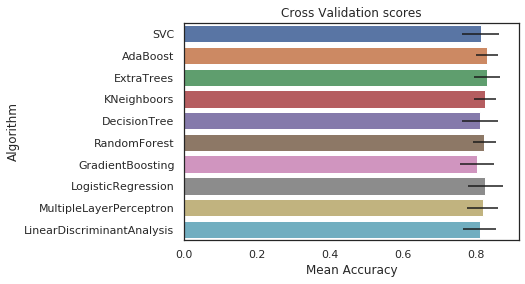

In [56]:
cv_results=[]
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier,x_train,y= y_train,scoring="accuracy",cv=kfold,n_jobs=4))

cv_means=[]
cv_std=[]
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res=pd.DataFrame({"CrossValMeans":cv_means,"Crossvalerrors":cv_std,
                     "Algorithm":["SVC",
                                   "AdaBoost",
                                    "ExtraTrees",
                                    "KNeighboors",
                                    "DecisionTree",
                                    "RandomForest",
                                    "GradientBoosting",
                                    "LogisticRegression",
                                    "MultipleLayerPerceptron",
                                    "LinearDiscriminantAnalysis"]})
g=sns.barplot("CrossValMeans","Algorithm",data=cv_res,ci=None,**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g=g.set_title("Cross Validation scores")
cv_res

In [57]:

cv_res.sort_values(by=['CrossValMeans','Crossvalerrors'],ascending=False)

,CrossValMeans,Crossvalerrors,Algorithm
1,0.829401,0.029233,AdaBoost
2,0.829388,0.035530,ExtraTrees
7,0.824981,0.047925,LogisticRegression
3,0.823795,0.030154,KNeighboors
5,0.822697,0.032323,RandomForest
8,0.818202,0.042477,MultipleLayerPerceptron
0,0.812634,0.050194,SVC
4,0.810387,0.049292,DecisionTree
9,0.809238,0.044762,LinearDiscriminantAnalysis
6,0.802534,0.046558,GradientBoosting


In [58]:
#adaBoost
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
                  "base_estimator__splitter" :   ["best", "random"],
                  "algorithm": ["SAMME","SAMME.R"],
                  "n_estimators" :[1,2],
                  "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsadaDTC.fit(x_train,y_train)
ada_best = gsadaDTC.best_estimator_
gsadaDTC.best_score_

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 1120 out of 1120 | elapsed:    4.2s finished


0.8081273408239701

In [59]:
#ExtraTrees 
ExtC = ExtraTreesClassifier()

## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}

gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsExtC.fit(x_train,y_train)
ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   17.8s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   42.7s
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:   52.8s finished


0.837278401997503

In [60]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()

## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}
gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsRFC.fit(x_train,y_train)
RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   19.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   47.2s
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:   59.0s finished


0.8338951310861422

In [61]:
# Gradient boosting 
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }
gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsGBC.fit(x_train,y_train)
GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    3.7s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   16.2s
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:   30.2s finished


0.8272159800249688

In [62]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}
gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsSVMC.fit(x_train,y_train)
SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    2.7s
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:   15.5s finished


0.8361298377028714

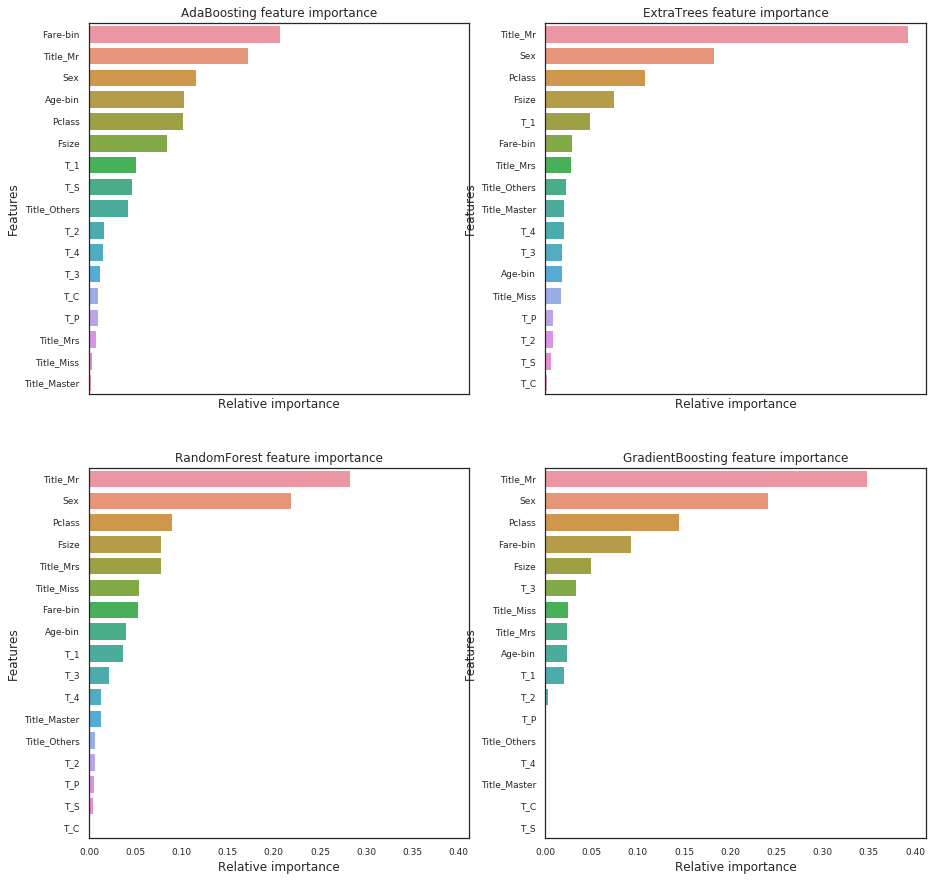

In [63]:
# Feature importance
nrows = ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,15))

names_classifiers = [("AdaBoosting", ada_best),("ExtraTrees",ExtC_best),
                     ("RandomForest",RFC_best),("GradientBoosting",GBC_best)]

nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:40]
        g = sns.barplot(y=x_train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row][col])
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nclassifier += 1

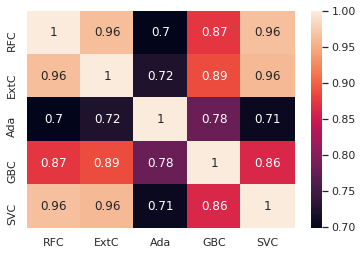

In [64]:
# Concatenate all classifier results
test_Survived_RFC = pd.Series(RFC_best.predict(test), name="RFC")
test_Survived_ExtC = pd.Series(ExtC_best.predict(test), name="ExtC")
test_Survived_SVMC = pd.Series(SVMC_best.predict(test), name="SVC")
test_Survived_AdaC = pd.Series(ada_best.predict(test), name="Ada")
test_Survived_GBC = pd.Series(GBC_best.predict(test), name="GBC")

ensemble_results = pd.concat([test_Survived_RFC,test_Survived_ExtC,test_Survived_AdaC,test_Survived_GBC, test_Survived_SVMC],axis=1)
g= sns.heatmap(ensemble_results.corr(),annot=True)

In [65]:
# Use voting classifier to combine the prediction power of all models
votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('extc', ExtC_best),
('svc', SVMC_best), ('adac',ada_best),('gbc',GBC_best)], voting='soft', n_jobs=4)
votingC = votingC.fit(x_train, y_train)

In [69]:
# Predict and export the results
test_Survived = pd.Series(votingC.predict(test), name="Survived")
results = pd.concat([IDtest,test_Survived],axis=1)
results.to_csv("/home/killerivy/Downloads/Final Submission File.csv",index=False)